# **Theme Park Ride Incidents**

## **Goal:** Explore Reported ride incidents and identify patterns by attraction type.

## **Data Source:** Safeparks 2017 Incident Dataset

## **Tools:** Python, Pandas, Matplotlib, Seaborn

___

In [136]:
import pandas as pd #for fata loading, cleaning, analysis
import matplotlib.pyplot as plt #for basic plotting
import seaborn as sns #for higher-level plots
import requests
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

In [137]:
safeparks_url = "https://ridesdatabase.org/wp-content/uploads/2022/04/Saferparks-dataset-2017-v4.csv"

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
response = requests.get(safeparks_url, headers=headers)
response.raise_for_status() #stops code if the download fails

df = pd.read_csv(StringIO(response.text),
                engine='python')


print("Dataset loaded successfully!")
print(f"Shape: {df.shape}\n")
print("Columns:", df.columns.tolist(), "\n")

df.head()

Dataset loaded successfully!
Shape: (8351, 23)

Columns: ['acc_id', 'acc_date', 'acc_state', 'acc_city', 'fix_port', 'source', 'bus_type', 'industry_sector', 'device_category', 'device_type', 'tradename_or_generic', 'manufacturer', 'num_injured', 'age_youngest', 'gender', 'acc_desc', 'injury_desc', 'report', 'category', 'mechanical', 'op_error', 'employee', 'notes'] 



,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,age_youngest,gender,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes
0,1005813,6/12/2010,OH,Cleveland,F,Ohio Dept. of Agriculture,Sports or recreation facility,recreation,inflatable,Inflatable slide,...,NaN,NaN,Inflatable slide tipped over while 7-9 patrons...,The man who was crushed by the device died 9 d...,https://ridesdatabase.org/accident_reports/OH-...,"Device tipped over, blew away, or collapsed",NaN,1.0,NaN,http://www.cleveland.com/metro/index.ssf/2012/...
1,1004032,6/12/2010,OH,Cleveland,P,United States Consumer Product Safety Commission,Sports or recreation facility,recreation,inflatable,Inflatable slide,...,54.0,M,Two adult males were standing next to an infla...,1 - death from pulmonary embolism caused by bl...,https://ridesdatabase.org/accident_reports/CPS...,"Device tipped over, blew away, or collapsed",NaN,1.0,NaN,See also OH state record.
2,1007658,7/10/2010,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,water ride,Boat ride,...,37.0,F,Patron stated she slipped and fell while stepp...,"Hip and low back pain, torn meniscus in knee",NaN,Load/Unload: scrape or stumble,NaN,NaN,NaN,NaN
3,1007098,7/10/2010,CA,Carlsbad,F,California Division of Occupational Safety and...,Water park,water park,float attraction,Lazy river,...,37.0,F,Patron claims strained back after her raft tip...,Strained back,NaN,"Fall: patron fell off inner tube, mat or board",NaN,NaN,NaN,NaN
4,1000094,7/29/2010,CO,Littleton,F,Colorado Division of Oil and Public Safety,Family entertainment center,recreation,challenge activity,Climbing wall,...,NaN,M,"Two patrons climbed to the top of the wall, co...",Patron experienced a free fall that resulted i...,https://ridesdatabase.org/accident_reports/CO-...,Fall: patron fell from device (participatory),1.0,NaN,NaN,NaN


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_id                8351 non-null   int64  
 1   acc_date              8351 non-null   object 
 2   acc_state             8351 non-null   object 
 3   acc_city              8233 non-null   object 
 4   fix_port              8351 non-null   object 
 5   source                8351 non-null   object 
 6   bus_type              8351 non-null   object 
 7   industry_sector       8351 non-null   object 
 8   device_category       8351 non-null   object 
 9   device_type           8351 non-null   object 
 10  tradename_or_generic  8351 non-null   object 
 11  manufacturer          5041 non-null   object 
 12  num_injured           8349 non-null   float64
 13  age_youngest          7667 non-null   float64
 14  gender                7623 non-null   object 
 15  acc_desc             

In [139]:
df.isnull().any()
df.isnull().sum()

acc_id                     0
acc_date                   0
acc_state                  0
acc_city                 118
fix_port                   0
source                     0
bus_type                   0
industry_sector            0
device_category            0
device_type                0
tradename_or_generic       0
manufacturer            3310
num_injured                2
age_youngest             684
gender                   728
acc_desc                   3
injury_desc               12
report                  8273
category                   0
mechanical              7977
op_error                8192
employee                8306
notes                   8290
dtype: int64

In [140]:
#The columns mechanical, op_error, and employee only have a 1 to mark what caused the incident. I am going to fill their null values with 0 to mark that it did not cause the error.
df["mechanical"].fillna(0, inplace = True)
df["op_error"].fillna(0, inplace=True)
df["employee"].fillna(0, inplace=True)

In [141]:
#Because the injury description for the missing values of num_injured do not specify the amount of injured, I will replace the missing values with the mean
mean_injured = df["num_injured"].mean(skipna=True)
df["num_injured"].fillna(mean_injured, inplace=True)

In [142]:
safeparks_data = df[['device_type', 'bus_type', 'fix_port', 'device_category', 'tradename_or_generic', 'manufacturer', 'num_injured', 'category', 'mechanical', 'op_error', 'employee']]

In [143]:
safeparks_data.head()

,device_type,bus_type,fix_port,device_category,tradename_or_generic,manufacturer,num_injured,category,mechanical,op_error,employee
0,Inflatable slide,Sports or recreation facility,F,inflatable,inflatable slide,Scherba Industries / Inflatable Images,9.0,"Device tipped over, blew away, or collapsed",0.0,1.0,0.0
1,Inflatable slide,Sports or recreation facility,P,inflatable,inflatable slide,Scherba Industries / Inflatable Images,8.0,"Device tipped over, blew away, or collapsed",0.0,1.0,0.0
2,Boat ride,Amusement park,F,water ride,boat ride,Arrow Dynamics,1.0,Load/Unload: scrape or stumble,0.0,0.0,0.0
3,Lazy river,Water park,F,float attraction,lazy river,California Pools,1.0,"Fall: patron fell off inner tube, mat or board",0.0,0.0,0.0
4,Climbing wall,Family entertainment center,F,challenge activity,climbing wall,Spectrum Sports,1.0,Fall: patron fell from device (participatory),1.0,0.0,0.0


What device type has the most industries? 
What attributes might contribute to the cause of these injuries? 

In [144]:
amusement_parks = safeparks_data[safeparks_data["bus_type"] == "Amusement park"] #I want to focus on just amusment park rides, not all rides

In [145]:
injuries_by_ride_type = amusement_parks.groupby("device_type")["num_injured"].sum().sort_values(ascending=False)
print(injuries_by_ride_type)

device_type
Coaster - steel           856.00000
Track ride                299.05318
Coaster - wooden          213.00000
Aquatic play area         180.00000
Flume ride                166.00000
                            ...    
Coaster - unidentified      2.00000
Bungee trampoline           2.00000
Freefall                    1.00000
Climbing wall               1.00000
Alpine gravity course       1.00000
Name: num_injured, Length: 74, dtype: float64


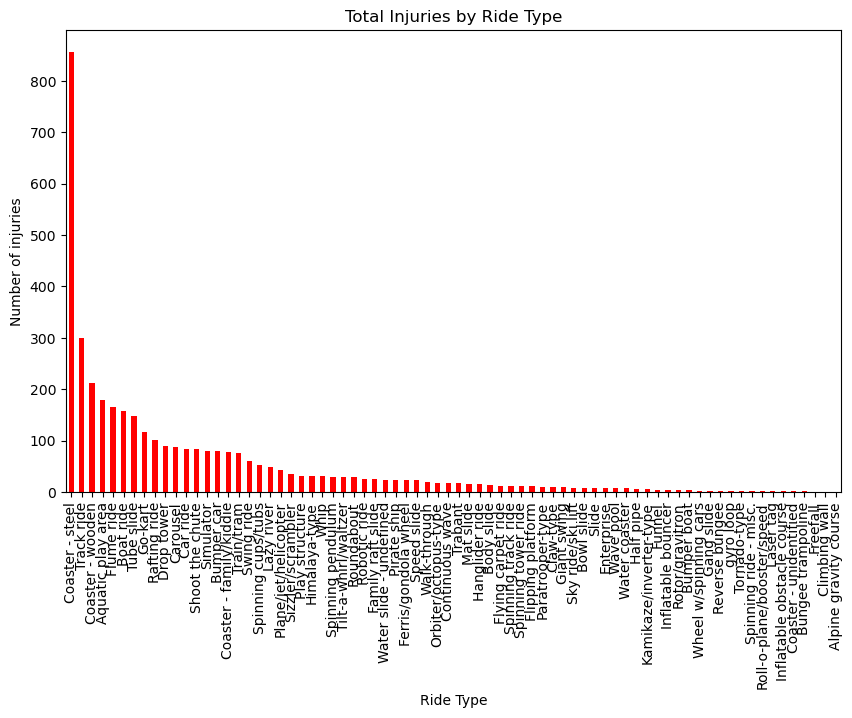

In [146]:
injuries_by_ride_type.plot(kind="bar", color='red', figsize=(10,6))
plt.title("Total Injuries by Ride Type")
plt.xlabel("Ride Type")
plt.ylabel("Number of injuries")
plt.show()

#### Based on this graph, I would like to look more into the top 10 to 15 rides with the most injuries

In [147]:
top15_rides = injuries_by_ride_type.sort_values(ascending=False).head(15)
print(top15_rides)

device_type
Coaster - steel      856.00000
Track ride           299.05318
Coaster - wooden     213.00000
Aquatic play area    180.00000
Flume ride           166.00000
Boat ride            158.00000
Tube slide           148.00000
Go-kart              116.00000
Rafting ride         101.00000
Drop tower            89.00000
Carousel              88.00000
Car ride              84.00000
Shoot the chute       83.00000
Simulator             80.00000
Bumper car            79.00000
Name: num_injured, dtype: float64


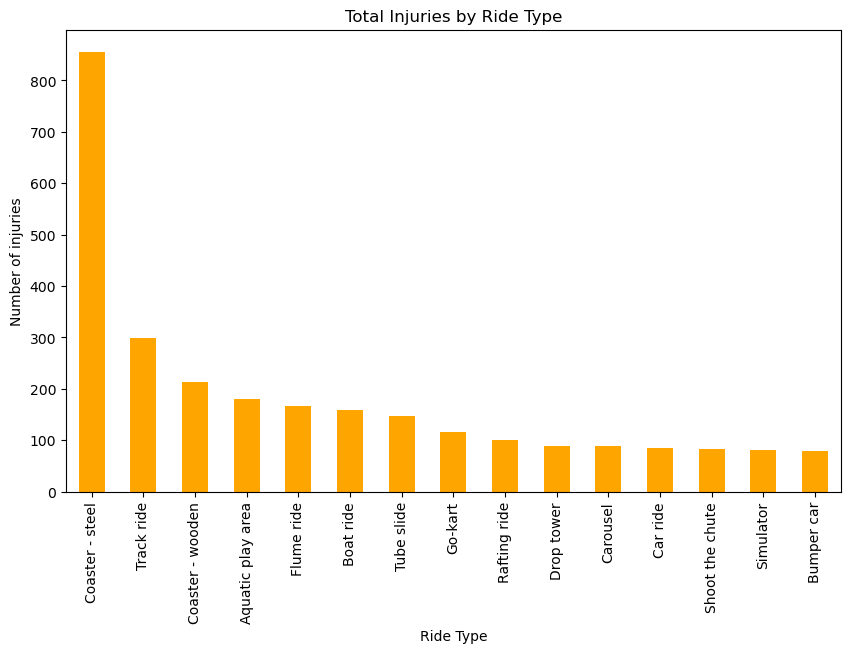

In [148]:
top15_rides.plot(kind="bar", color='orange', figsize=(10,6))
plt.title("Total Injuries by Ride Type")
plt.xlabel("Ride Type")
plt.ylabel("Number of injuries")
plt.show()

#### I would like to see if any other attribute may cause an increase in injuries such as the manufacturer used. Also, I would be interested in what kind of injury ocurrs most often and if there is something that can be done to decrease that amount.

In [149]:
top15_ride_types = top15_rides.index

In [150]:
top15_data = amusement_parks[
    amusement_parks['device_type'].isin(top15_ride_types)
    ]

In [151]:
injuries_by_manufacturer = top15_data.groupby('manufacturer')['num_injured'].sum().sort_values(ascending=False)
print(injuries_by_manufacturer)

manufacturer
In-house                                    742.0
Intamin AG                                  351.0
Arrow Dynamics                              239.0
Vekoma                                       95.0
Bolliger & Mabillard                         88.0
                                            ...  
Hodges Hand Cars                              1.0
Hi-Lite Rides - Grover Watkins - Venture      1.0
Preston & Barbieri                            1.0
ETF Ride Systems                              1.0
Interactive Rides, Inc.                       1.0
Name: num_injured, Length: 82, dtype: float64


In [152]:
mechanical_error = top15_data['mechanical'].sum()
op_error = top15_data['op_error'].sum()
employee_error = top15_data['employee'].sum()

print('Mechanical Error:', mechanical_error,
      'Operational Error:', op_error,
      'Employee Error:', employee_error)

Mechanical Error: 120.0 Operational Error: 16.0 Employee Error: 4.0


Of the 2684 entries, only 140 were attributed to either a mechanical(120), operational(16), or employee error(4).  This means that most injuries were due to a factor outside of this.

In [155]:
cycle_injury = top15_data.groupby('category')['num_injured'].sum().sort_values(ascending=False)
print(cycle_injury)

category
Body pain (normal motion)                                 464.00000
Load/Unload: scrape or stumble                            363.00000
Impact: hit something within ride vehicle                 361.00000
Illness or neurological symptoms                          322.00000
Illness: Seizure or LOC                                   159.00000
Impact: hit something in participatory attraction         108.00000
Collision: patron-controlled vehicles                      98.00000
Fall: patron fell off inner tube, mat or board             77.00000
Abrupt stop/drop/lurch                                     64.00000
Entrapment or pinch-point                                  61.00000
Fall: in climb or play area                                58.00000
Injured by foreign object                                  50.00000
Load/Unload: hit or pinched by restraint                   48.00000
Injured in queue or exit                                   45.00000
Unknown (not enough info)              

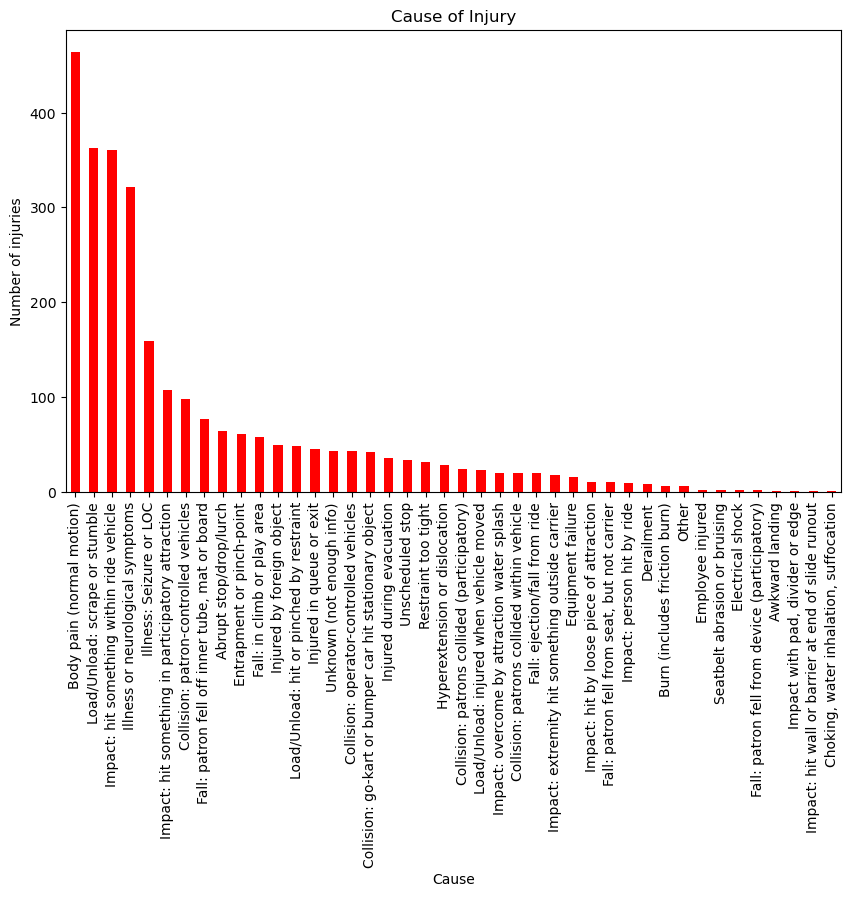

In [157]:
cycle_injury.plot(kind="bar", color='red', figsize=(10,6))
plt.title("Cause of Injury")
plt.xlabel("Cause")
plt.ylabel("Number of injuries")
plt.show()

#### This is a lot of different causes, I would like to focus on the top 20 injury causes

In [178]:
top20_causes = (top15_data['category'].value_counts().head(20).index)

top15_top20_causes = top15_data[top15_data['category'].isin(top20_causes)]

In [179]:
pivot_table = top15_top20_causes.pivot_table(
    values = 'num_injured',
    index = 'device_type',
    columns = 'category',
    aggfunc= 'sum',
    fill_value = 0
)
pivot_table.head()

category,Abrupt stop/drop/lurch,Body pain (normal motion),Collision: go-kart or bumper car hit stationary object,Collision: operator-controlled vehicles,Collision: patron-controlled vehicles,Entrapment or pinch-point,Fall: in climb or play area,"Fall: patron fell off inner tube, mat or board",Hyperextension or dislocation,Illness or neurological symptoms,Illness: Seizure or LOC,Impact: hit something in participatory attraction,Impact: hit something within ride vehicle,Injured by foreign object,Injured during evacuation,Injured in queue or exit,Load/Unload: hit or pinched by restraint,Load/Unload: scrape or stumble,Restraint too tight,Unknown (not enough info)
device_type,,,,,,,,,,,,,,,,,,,,
Aquatic play area,0.0,1.0,0.0,0.0,0.0,4.0,54.0,1.0,2.0,1.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0
Boat ride,4.0,6.0,0.0,7.0,1.0,5.0,2.0,0.0,0.0,35.0,17.0,0.0,11.0,2.0,5.0,1.0,0.0,53.0,0.0,0.0
Bumper car,0.0,3.0,1.0,0.0,22.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,27.0,0.0,3.0
Car ride,0.0,7.0,1.0,0.0,15.0,5.0,2.0,0.0,0.0,8.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,25.0,0.0,1.0
Carousel,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,4.0,0.0,2.0,1.0,0.0,3.0,0.0,56.0,0.0,2.0


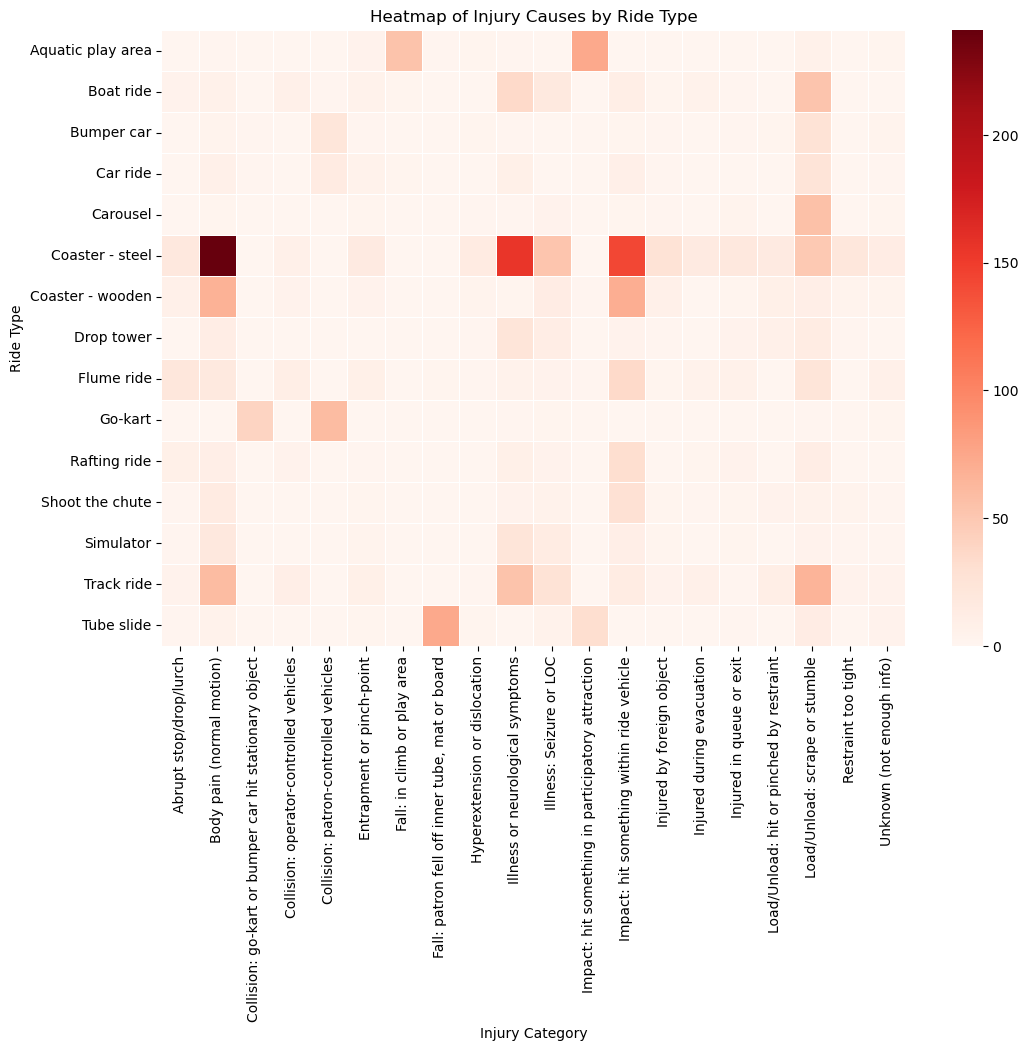

In [180]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap="Reds", linewidths=0.5)
plt.title("Heatmap of Injury Causes by Ride Type")
plt.xlabel("Injury Category")
plt.ylabel("Ride Type")
plt.show()

What percentage of injuries in amusement parks were caused by Steel Coasters? 
What percentage of injuries are body pain? 

In [201]:
total_injuries = amusement_parks['num_injured'].sum()

injury_percentage = (injuries_by_ride_type / total_injuries * 100).sort_values(ascending=False)

print(injury_percentage.head(15))

cause_percentage = (cycle_injury/ total_injuries *100).sort_values(ascending=False)

print(cause_percentage.head(15))

device_type
Coaster - steel      22.783814
Track ride            7.959780
Coaster - wooden      5.669337
Aquatic play area     4.790989
Flume ride            4.418356
Boat ride             4.205424
Tube slide            3.939258
Go-kart               3.087526
Rafting ride          2.688277
Drop tower            2.368878
Carousel              2.342261
Car ride              2.235795
Shoot the chute       2.209178
Simulator             2.129328
Bumper car            2.102712
Name: num_injured, dtype: float64
category
Body pain (normal motion)                            12.350105
Load/Unload: scrape or stumble                        9.661828
Impact: hit something within ride vehicle             9.608594
Illness or neurological symptoms                      8.570547
Illness: Seizure or LOC                               4.232040
Impact: hit something in participatory attraction     2.874593
Collision: patron-controlled vehicles                 2.608427
Fall: patron fell off inner tube, mat o

## Conclusion

Based on this analysis, steel coasters were identified as the ride type associated with the highest number of reported injuries in amusement parks, accounting for approximately 23% of all injuries. The most common injury category observed was body pain, defined as pain reported to have occurred during or shortly after the ride experience, representing about 12% of all reported injuries. 

Several limitations should be noted. The dataset does not account for pre-existing medical conditions, which may influence injury outcomes, nor does it include environmental factors such as daily weather conditions that could contribute to incidents (e.g., wet surfaces increasing the likelihood of slips or falls). Additionally, the data reflects reported incidents only and may not capture all minor or unreported injuries.

Future work could expand this analysis by incorporating more recent data and focusing on specific geographic locations, such as Disney, Universal Studios, and SeaWorld parks on both coasts of the United States. Comparing injury frequency and causes between theme parks in Florida and California may help identify how differences in park layout, terrain, and climate (e.g., flat vs. hilly terrain, wet vs. dry weather) influence injury patterns. Additional factors such as ride age, maintenance history, and renovation timelines could also provide further insight into injury risk